In [1]:
%matplotlib inline
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create 1D Gaussian toy data.
np.random.seed(1)  # set random seed
# Draw 10 values from unit Gaussian.
Data = np.random.normal(0.0, 1.0, 10)

## Brute-force grids

/home/simon/miniconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


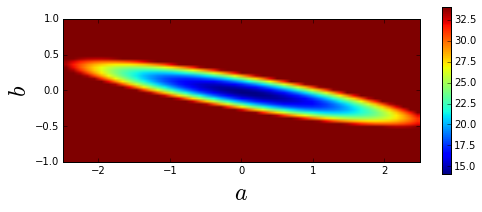

In [3]:
# Range of parameter a.
a_min = -2.5
a_max =  2.5
# Range of parameter b.
b_min = -1.0
b_max =  1.0
# Number of steps of grid.
Steps = 51
# Allocate grid as matrix.
Grid  = np.zeros([Steps,Steps])
# Try all parameter combinations.
for s1 in range(Steps):
    for s2 in range(Steps):
        # Current parameter combination.
        a = a_min + (a_max - a_min)*float(s1)/float(Steps-1)
        b = b_min + (b_max - b_min)*float(s2)/float(Steps-1)

        # Evaluate chi-squared.
        chi2 = 0.0
        for n in range(len(Data)):
            # Use index n as pseudo-position
            residual = (Data[n] - a - n*b)
            chi2     = chi2 + residual*residual
        Grid[Steps-1-s2,s1] = chi2

plt.figure(1, figsize=(8,3))
mini  = np.min(Grid)  # minimal value of chi2
image = plt.imshow(Grid, vmin=mini, vmax=mini+20.0,
                         extent=[a_min,a_max,b_min,b_max])
plt.colorbar(image)
plt.xlabel(r'$a$', fontsize=24)
plt.ylabel(r'$b$', fontsize=24)
plt.savefig('example-chi2-manifold.png')
plt.show()

## Least-squares fitting

In [4]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = numpy.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = numpy.array([0.1,0.9,2.2,2.8,3.9,5.1])
# Initial guess.
x0    = numpy.array([0.0, 0.0, 0.0])

# Data errors can also easily be provided:
sigma = numpy.array([1.0,1.0,1.0,1.0,1.0,1.0])

<Container object of 3 artists>

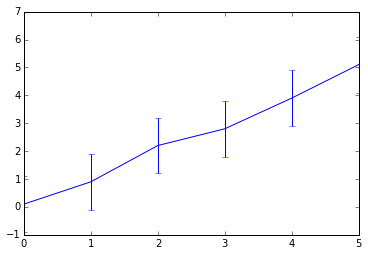

In [5]:
plt.errorbar(xdata, ydata, yerr=sigma)

In [6]:
def func(x, a, b, c):
    return a + b*x + c*x*x

In [7]:
import scipy.optimize as optimization

p, v = optimization.curve_fit(func, xdata, ydata, x0, sigma)
p, v

(array([ 0.1       ,  0.88142857,  0.02142857]),
 array([[ 0.02753741, -0.0197551 ,  0.0029932 ],
        [-0.0197551 ,  0.02436463, -0.0044898 ],
        [ 0.0029932 , -0.0044898 ,  0.00089796]]))

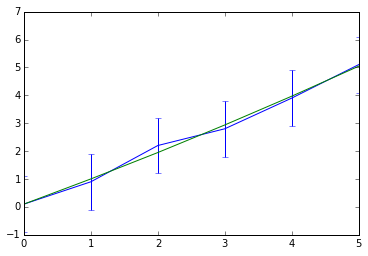

In [8]:
plt.errorbar(xdata, ydata, yerr=sigma)
plt.plot(np.poly1d(p[::-1])(xdata))

In [9]:
# The function whose square is to be minimised.
# params ... list of parameters tuned to minimise function.
# Further arguments:
# xdata ... design matrix for a linear model.
# ydata ... observed data.
def func(params, xdata, ydata):
    return (ydata - numpy.dot(xdata, params))

In [10]:
x0    = numpy.array([0.0, 0.0])

In [11]:
# The toy data now needs to be provided in a more complex way:

# Provide data as design matrix: straight line with a=0 and b=1 plus some noise.
xdata = numpy.transpose(numpy.array([[1.0,1.0,1.0,1.0,1.0,1.0],
              [0.0,1.0,2.0,3.0,4.0,5.0]]))

# Now, we can use the least-squares method:
res = optimization.leastsq(func, x0, args=(xdata, ydata))
res

(array([ 0.02857143,  0.98857143]), 2)

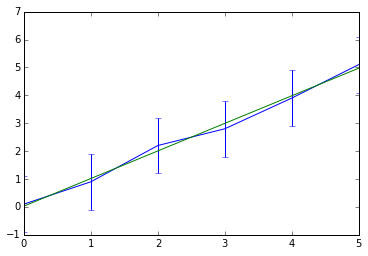

In [12]:
plt.errorbar(xdata.T[1], ydata, yerr=sigma)
plt.plot(np.poly1d(res[0][::-1])(xdata.T[1]))

## Curve fitting with SciPy

Scale =  9.563 +/- 1.170
Offset = 2.866 +/- 0.144
Sigma =  1.661 +/- 0.278


/home/simon/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


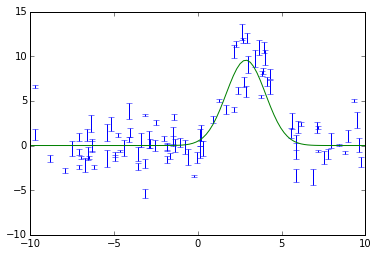

In [17]:
from scipy.optimize import curve_fit

# Create a function
# ==> First encounter with *whitespace* in Python <==
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

# Generate fake data.
# Note: functions in random package, array arithmetic (exp)
n = 100
x = np.random.uniform(-10., 10., n)
y = np.exp(-(x - 3.)**2 / 4) * 10. + np.random.normal(0., 2., n)
e = np.random.uniform(0.1, 1., n)

# Fit
popt, pcov = curve_fit(gaussian, x, y, sigma=e)

# Print results
print "Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0]))
print "Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1]))
print "Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2]))

# Plot data
plt.errorbar(x, y, yerr=e, linewidth=1, color='black', fmt=None)

# Plot model
xm = np.linspace(-10., 10., 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))
